<a href="https://colab.research.google.com/github/swilsonmfc/notebooks/blob/master/AutoML_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyCaret

![alt text](https://www.fondation-louisbonduelle.org/wp-content/uploads/2016/10/carotte_222805396.png)

# Setup

In [1]:
pip install pycaret


     |████████████████████████████████| 194kB 3.4MB/s 
     |████████████████████████████████| 1.6MB 10.8MB/s 
     |████████████████████████████████| 63.9MB 55kB/s 
     |████████████████████████████████| 1.2MB 45.6MB/s 
     |████████████████████████████████| 7.0MB 18.7MB/s 
     |████████████████████████████████| 133kB 45.2MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 102kB 10.2MB/s 
     |████████████████████████████████| 81kB 9.0MB/s 
     |████████████████████████████████| 389kB 39.1MB/s 
     |████████████████████████████████| 266kB 42.2MB/s 
     |████████████████████████████████| 3.2MB 41.8MB/s 
     |████████████████████████████████| 552kB 41.7MB/s 
     |████████████████████████████████| 604kB 38.4MB/s 
     |████████████████████████████████| 235kB 48.3MB/s 
     |████████████████████████████████| 2.1MB 43.7MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 
     |████████████████████████████████| 6.3MB 41.2MB/s 


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.classification import *

In [2]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode activated.


# Kaggle

In [3]:
!pip install kaggle
!mkdir -p ~/.kaggle

In [0]:
from google.colab import files
files.upload()

In [5]:
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

# Data

In [6]:
!kaggle datasets download -d ronitf/heart-disease-uci

  0% 0.00/3.40k [00:00<?, ?B/s]
100% 3.40k/3.40k [00:00<00:00, 1.34MB/s]


In [13]:
!unzip /content/heart-disease-uci.zip

Archive:  /content/heart-disease-uci.zip
  inflating: heart.csv               


In [14]:
!ls -al

total 32
drwxr-xr-x 1 root root  4096 Jun 13 16:49 .
drwxr-xr-x 1 root root  4096 Jun 13 15:56 ..
drwxr-xr-x 1 root root  4096 Jun 10 16:28 .config
-rw-r--r-- 1 root root 11328 Oct  1  2019 heart.csv
-rw-r--r-- 1 root root  3478 Jun 13 16:47 heart-disease-uci.zip
drwxr-xr-x 1 root root  4096 Jun 10 16:28 sample_data


In [15]:
df = pd.read_csv('/content/heart.csv')

In [16]:
df.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

# EDA
* age
* sex
* cp: chest pain type (4 values)
* trestbps: resting blood pressure
* chol: serum cholestoral in mg/dl
* fbs: fasting blood sugar > 120 mg/dl
* restecg: resting electrocardiographic results (values 0,1,2)
* thalach: maximum heart rate achieved
* exang: exercise induced angina
* oldpeak: oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 

## Age

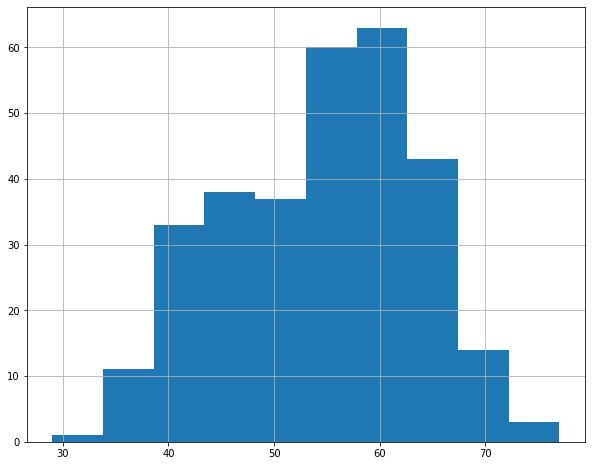

In [17]:
df.age.hist(figsize=(10,8))

## Sex
* There are more males than females (2-1)

Text(0, 0.5, 'Count')

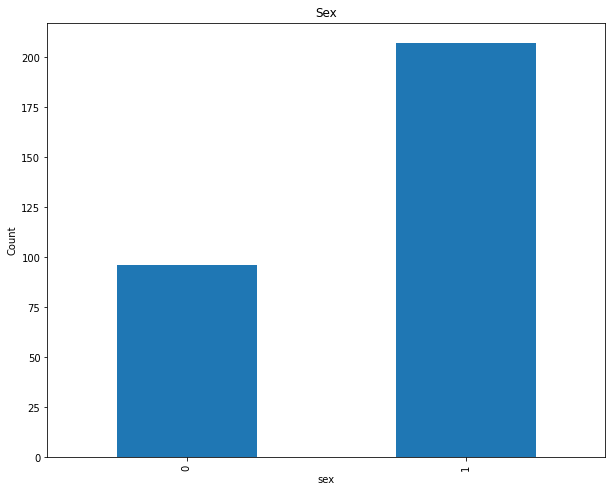

In [26]:
df.groupby('sex').size().plot.bar(figsize=(10,8))
plt.title('Sex')
plt.ylabel('Count')

## Sex, Age & Target

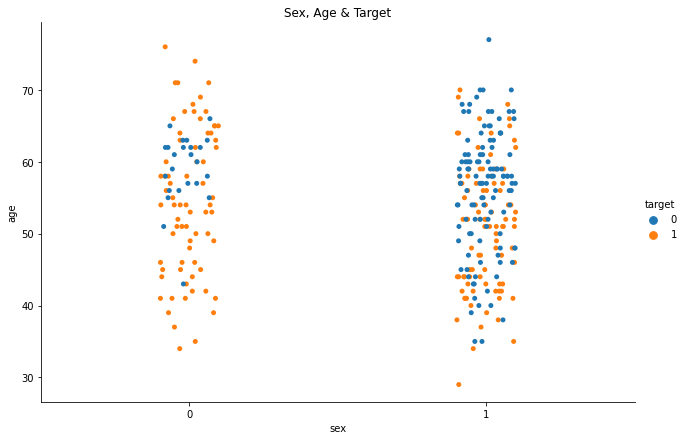

In [41]:
sns.catplot(x="sex", y="age", hue="target", height=6, aspect=1.5, data=df)
plt.title('Sex, Age & Target');

## Chest Pain

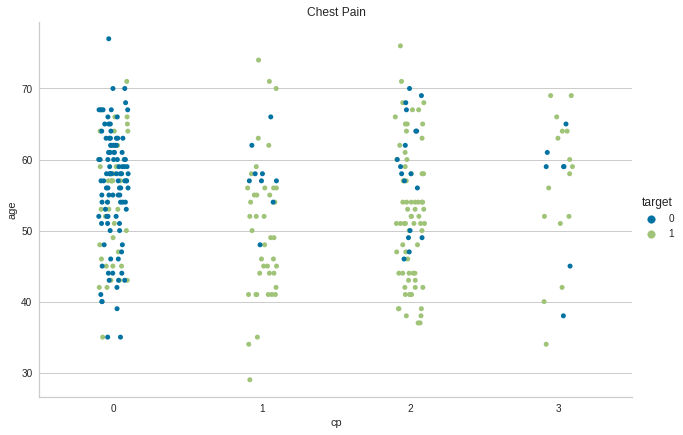

In [131]:
sns.catplot(x="cp", y="age", hue="target", height=6, aspect=1.5, data=df)
plt.title('Chest Pain');

## Resting Blood Pressure

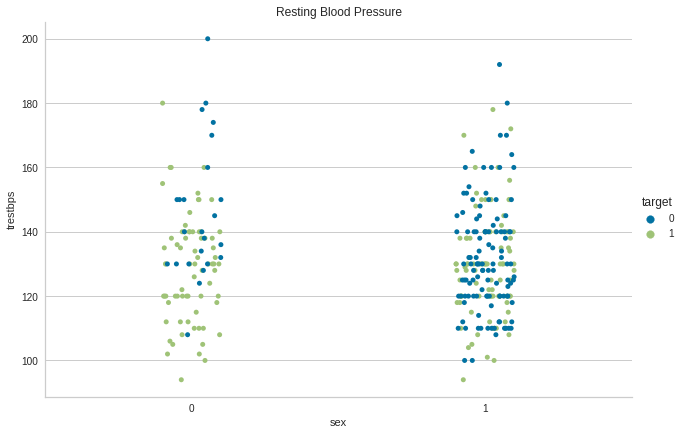

In [133]:
sns.catplot(x="sex", y="trestbps", hue="target", height=6, aspect=1.5, data=df)
plt.title('Resting Blood Pressure');

## Cholesterol

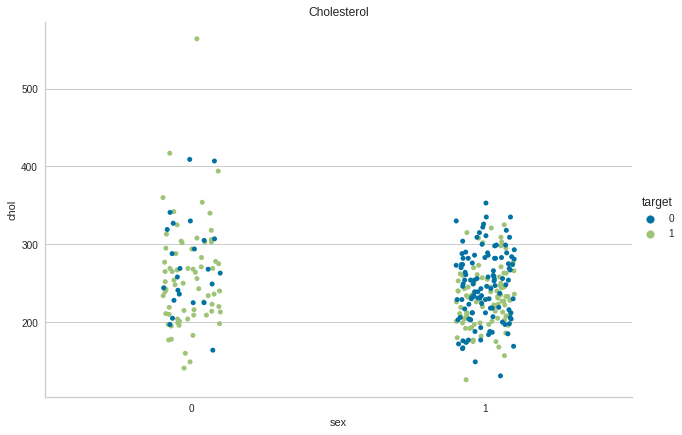

In [140]:
sns.catplot(x='sex', y="chol", hue="target", height=6, aspect=1.5, data=df)
plt.title('Cholesterol');

## Resting ECG

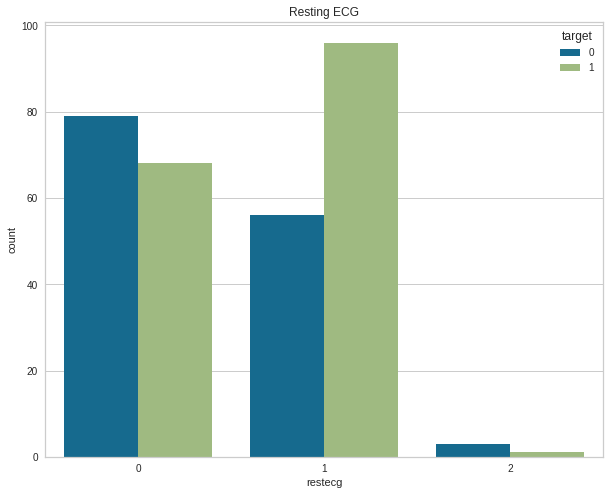

In [167]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x='restecg', hue="target", ax=ax, data=df)
plt.title('Resting ECG');

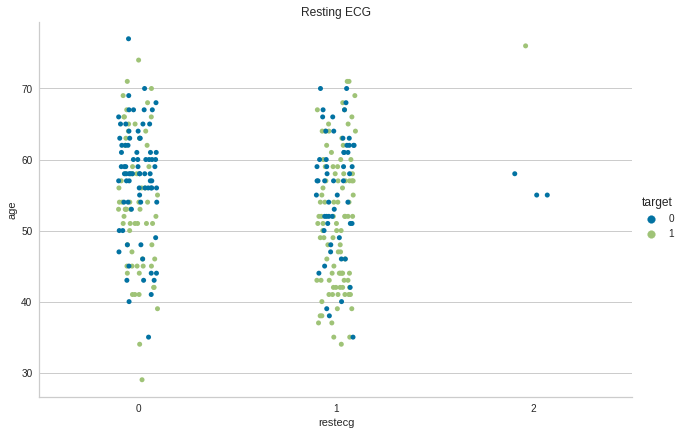

In [141]:
sns.catplot(x='restecg', y="age", hue="target", height=6, aspect=1.5, data=df)
plt.title('Resting ECG');

## Fluoroscopy Coloring

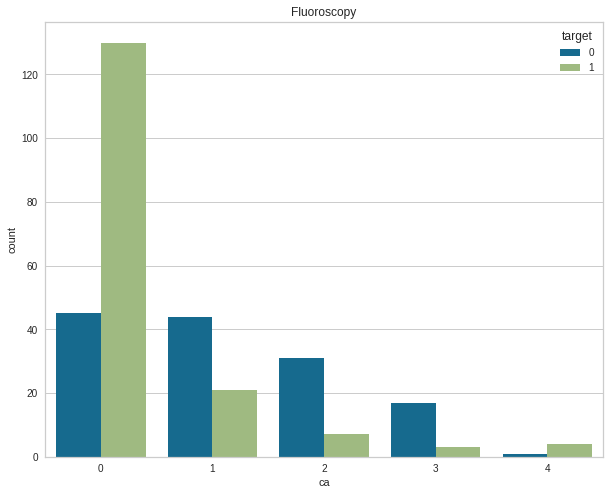

In [166]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x='ca', hue="target", ax=ax, data=df)
plt.title('Fluoroscopy');

## Thalassemia

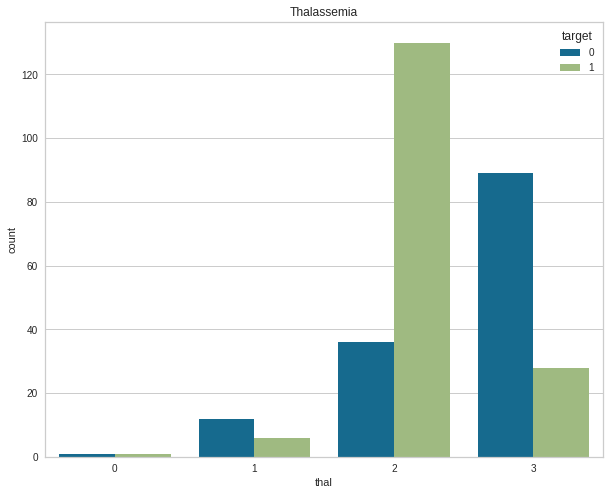

In [168]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x='thal', hue="target", ax=ax, data=df)
plt.title('Thalassemia');

# PyCaret
* Generates an experiment
* Takes our data and target and applies configurable pipeline steps
* Once completed, we can use the data in our experiment to test and explore model performance

![Pipeline](https://miro.medium.com/max/1400/1*jo9vPsQhQZmyXUhnrt9akQ.png)

In [44]:
exp1 = setup(df, target = 'target', silent = True) 

 
Setup Succesfully Completed!


# Compare
* Generate a series of models with cross-fold validation
* Present the results across a variety of metrics to identify promising models

In [45]:
compare_models()

# Model 
* We can generate a model using of up to 60 different models in PyCaret
* The toolkit provides plotting tools & model evaluations (appropriate for a given technique) 
* We can quickly improve a model using hyper-parameter tuning
* For tree-based models we can interpret the results using the shap library

## Logistic Regression

In [223]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.9091  1.0000  0.8333  1.0000  0.9091  0.8197
1       0.9091  0.9250  0.8333  1.0000  0.9091  0.8197
2       0.8571  0.9167  1.0000  0.8000  0.8889  0.6957
3       0.9048  0.8981  1.0000  0.8571  0.9231  0.8000
4       0.8571  0.9630  1.0000  0.8000  0.8889  0.6957
5       0.7143  0.8182  0.7273  0.7273  0.7273  0.4273
6       0.8571  0.9545  0.9091  0.8333  0.8696  0.7123
7       0.8095  0.9000  0.8182  0.8182  0.8182  0.6182
8       0.7143  0.9000  0.8182  0.6923  0.7500  0.4220
9       0.8571  0.9455  0.8182  0.9000  0.8571  0.7149
Mean    0.8390  0.9221  0.8758  0.8428  0.8541  0.6725
SD      0.0689  0.0466  0.0911  0.0966  0.0646  0.1378

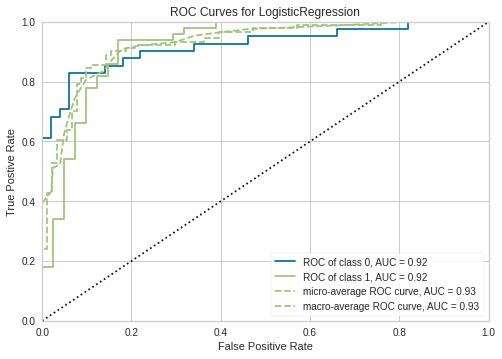

In [224]:
plot_model(lr, plot = 'auc')

In [195]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [196]:
tuned_lr = tune_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.9091  1.0000  0.8333  1.0000  0.9091  0.8197
1       0.9091  0.9333  0.8333  1.0000  0.9091  0.8197
2       0.7619  0.9537  0.9167  0.7333  0.8148  0.4928
3       0.8571  0.8796  0.9167  0.8462  0.8800  0.7042
4       0.8095  0.9352  1.0000  0.7500  0.8571  0.5882
5       0.7619  0.8364  0.8182  0.7500  0.7826  0.5205
6       0.8571  0.9545  0.9091  0.8333  0.8696  0.7123
7       0.8095  0.8818  0.8182  0.8182  0.8182  0.6182
8       0.7143  0.9000  0.8182  0.6923  0.7500  0.4220
9       0.8571  0.9364  0.8182  0.9000  0.8571  0.7149
Mean    0.8247  0.9211  0.8682  0.8323  0.8448  0.6413
SD      0.0616  0.0446  0.0601  0.1021  0.0499  0.1289

In [197]:
plot_model(tuned_lr, plot = 'parameter')

Parameters
C                      8.889
class_weight        balanced
dual                   False
fit_intercept           True
intercept_scaling          1
l1_ratio                None
max_iter                 100
multi_class             auto
n_jobs                  None
penalty                   l2
random_state            1149
solver                 lbfgs
tol                   0.0001
verbose                    0
warm_start             False

## Random Forest

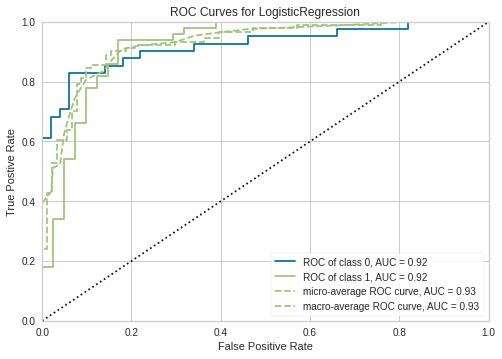

In [199]:
rf = create_model('rf')
plot_model(lr, plot = 'auc')

In [200]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [201]:
tuned_rf = tune_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8636  0.9667  0.7500  1.0000  0.8571  0.7317
1       0.8636  0.9083  0.8333  0.9091  0.8696  0.7273
2       0.7619  0.8611  0.8333  0.7692  0.8000  0.5070
3       0.8571  0.8704  0.9167  0.8462  0.8800  0.7042
4       0.8095  0.9630  1.0000  0.7500  0.8571  0.5882
5       0.6190  0.7818  0.6364  0.6364  0.6364  0.2364
6       0.8571  0.9182  0.8182  0.9000  0.8571  0.7149
7       0.8571  0.8727  0.9091  0.8333  0.8696  0.7123
8       0.8095  0.9182  0.8182  0.8182  0.8182  0.6182
9       0.7619  0.9455  0.8182  0.7500  0.7826  0.5205
Mean    0.8061  0.9006  0.8333  0.8212  0.8228  0.6061
SD      0.0730  0.0532  0.0932  0.0968  0.0694  0.1475

In [202]:
plot_model(tuned_rf, plot = 'parameter')

Parameters
bootstrap                      True
ccp_alpha                         0
class_weight                   None
criterion                      gini
max_depth                        60
max_features                   sqrt
max_leaf_nodes                 None
max_samples                    None
min_impurity_decrease             0
min_impurity_split             None
min_samples_leaf                  2
min_samples_split                 2
min_weight_fraction_leaf          0
n_estimators                     90
n_jobs                         None
oob_score                     False
random_state                   1149
verbose                           0
warm_start                    False

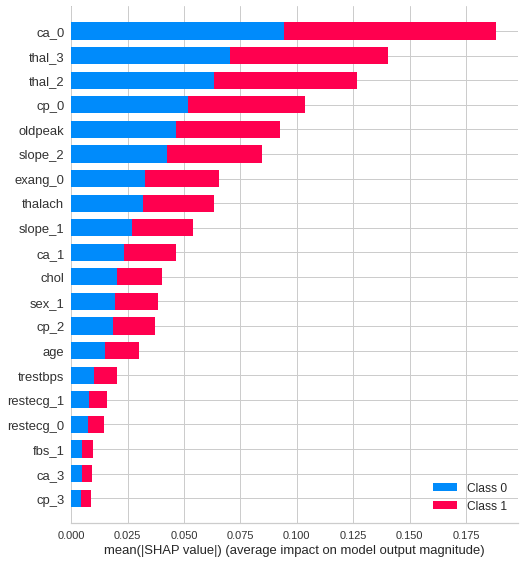

In [208]:
interpret_model(tuned_rf)

## Catboost

In [50]:
catboost = create_model('catboost')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.9091  0.9750  0.8333  1.0000  0.9091  0.8197
1       0.7727  0.8833  0.6667  0.8889  0.7619  0.5528
2       0.8095  0.8519  0.9167  0.7857  0.8462  0.6000
3       0.8571  0.8333  0.9167  0.8462  0.8800  0.7042
4       0.8095  0.9352  1.0000  0.7500  0.8571  0.5882
5       0.6667  0.7364  0.7273  0.6667  0.6957  0.3288
6       0.8095  0.9273  0.7273  0.8889  0.8000  0.6216
7       0.7619  0.8727  0.8182  0.7500  0.7826  0.5205
8       0.8095  0.9182  0.8182  0.8182  0.8182  0.6182
9       0.8571  0.9273  0.8182  0.9000  0.8571  0.7149
Mean    0.8063  0.8861  0.8242  0.8294  0.8208  0.6069
SD      0.0619  0.0643  0.0958  0.0909  0.0597  0.1245

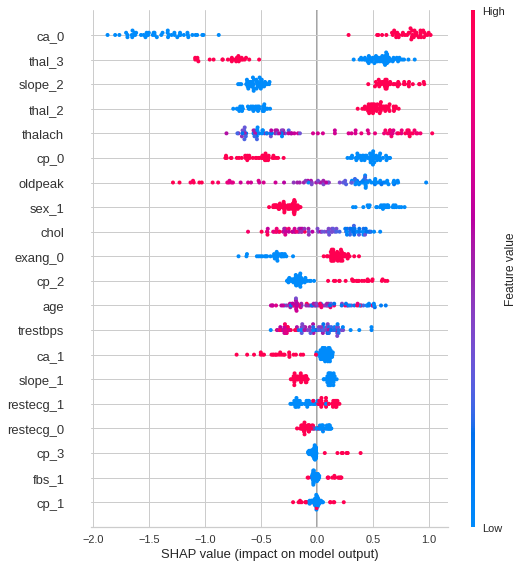

In [57]:
interpret_model(catboost)

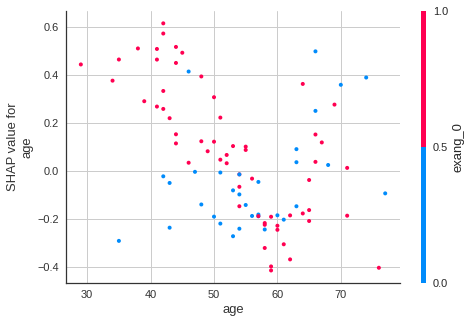

In [59]:
interpret_model(catboost, plot = 'correlation')

In [51]:
tuned_catboost = tune_model('catboost')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8636  0.9500  0.7500  1.0000  0.8571  0.7317
1       0.8182  0.9000  0.7500  0.9000  0.8182  0.6393
2       0.8095  0.8981  0.9167  0.7857  0.8462  0.6000
3       0.9048  0.9074  1.0000  0.8571  0.9231  0.8000
4       0.9048  1.0000  1.0000  0.8571  0.9231  0.8000
5       0.7619  0.8364  0.8182  0.7500  0.7826  0.5205
6       0.8095  0.9455  0.7273  0.8889  0.8000  0.6216
7       0.8571  0.8727  0.8182  0.9000  0.8571  0.7149
8       0.7619  0.9000  0.7273  0.8000  0.7619  0.5249
9       0.8571  0.9364  0.9091  0.8333  0.8696  0.7123
Mean    0.8348  0.9146  0.8417  0.8572  0.8439  0.6665
SD      0.0488  0.0431  0.1022  0.0675  0.0516  0.0964

# Prediction
* Generating predictions on a model
* When new data isn't passed in this uses the hold out set in the experiment
* Two additional columns are added to the predict dataset
  * Label = The predicted class
  * Score = The predicted probability
* For tree based methods we can look at the reason for a prediction using shap

In [61]:
predict_model(tuned_lr)

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa
0  Logistic Regression    0.8571  0.9215    0.88  0.8627  0.8713  0.7108

age  trestbps   chol  thalach  ...  thal_3  target  Label   Score
0   76.0     140.0  197.0    116.0  ...     0.0       1      1  0.9228
1   48.0     122.0  222.0    186.0  ...     0.0       1      1  0.9295
2   56.0     132.0  184.0    105.0  ...     0.0       0      0  0.0172
3   74.0     120.0  269.0    121.0  ...     0.0       1      1  0.5686
4   62.0     130.0  231.0    146.0  ...     1.0       1      0  0.1562
..   ...       ...    ...      ...  ...     ...     ...    ...     ...
86  65.0     140.0  417.0    157.0  ...     0.0       1      1  0.8639
87  71.0     112.0  149.0    125.0  ...     0.0       1      1  0.8757
88  29.0     130.0  204.0    202.0  ...     0.0       1      1  0.9125
89  55.0     135.0  250.0    161.0  ...     0.0       1      1  0.7878
90  51.0     130.0  305.0    142.0  ...     1.0       0      0  0.2232

[91 rows x 30 columns]

In [207]:
predict_model(tuned_rf)

Model  Accuracy     AUC  Recall   Prec.     F1   Kappa
0  Random Forest Classifier    0.8571  0.9083    0.84  0.8936  0.866  0.7134

age  trestbps   chol  thalach  ...  thal_3  target  Label   Score
0   76.0     140.0  197.0    116.0  ...     0.0       1      1  0.7514
1   48.0     122.0  222.0    186.0  ...     0.0       1      1  0.9408
2   56.0     132.0  184.0    105.0  ...     0.0       0      0  0.1280
3   74.0     120.0  269.0    121.0  ...     0.0       1      1  0.5742
4   62.0     130.0  231.0    146.0  ...     1.0       1      0  0.0834
..   ...       ...    ...      ...  ...     ...     ...    ...     ...
86  65.0     140.0  417.0    157.0  ...     0.0       1      1  0.6648
87  71.0     112.0  149.0    125.0  ...     0.0       1      1  0.6700
88  29.0     130.0  204.0    202.0  ...     0.0       1      1  0.9689
89  55.0     135.0  250.0    161.0  ...     0.0       1      1  0.8284
90  51.0     130.0  305.0    142.0  ...     1.0       0      0  0.1514

[91 rows x 30 columns]

In [221]:
interpret_model(tuned_rf, plot='reason', observation=0)

In [206]:
predict_model(tuned_catboost)

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa
0  CatBoost Classifier    0.8132  0.8971    0.84  0.8235  0.8317  0.6219

age  trestbps   chol  thalach  ...  thal_3  target  Label   Score
0   76.0     140.0  197.0    116.0  ...     0.0       1      1  0.5071
1   48.0     122.0  222.0    186.0  ...     0.0       1      1  0.5143
2   56.0     132.0  184.0    105.0  ...     0.0       0      0  0.4923
3   74.0     120.0  269.0    121.0  ...     0.0       1      1  0.5039
4   62.0     130.0  231.0    146.0  ...     1.0       1      0  0.4911
..   ...       ...    ...      ...  ...     ...     ...    ...     ...
86  65.0     140.0  417.0    157.0  ...     0.0       1      1  0.5047
87  71.0     112.0  149.0    125.0  ...     0.0       1      1  0.5042
88  29.0     130.0  204.0    202.0  ...     0.0       1      1  0.5164
89  55.0     135.0  250.0    161.0  ...     0.0       1      1  0.5084
90  51.0     130.0  305.0    142.0  ...     1.0       0      0  0.4930

[91 rows x 30 columns]

In [222]:
interpret_model(tuned_catboost, plot='reason', observation=0)

# Calibration
* We sort our predictions by probability
* Bin the predictions 
* Compare the fraction of positives against the percent of positives in the bin
* Using CalibratedClassifierCV we can attempt to adjust our model to be more reliable using
  * Sigmoid Method
  * Isotonic Method
* https://medium.com/analytics-vidhya/calibration-in-machine-learning-e7972ac93555

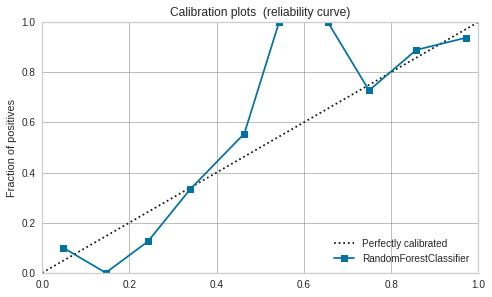

In [210]:
plot_model(tuned_rf, plot='calibration')

In [211]:
rf_calibrated = calibrate_model(tuned_rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8636  0.9833  0.7500  1.0000  0.8571  0.7317
1       0.7727  0.9083  0.6667  0.8889  0.7619  0.5528
2       0.8095  0.9074  0.9167  0.7857  0.8462  0.6000
3       0.8571  0.8611  0.9167  0.8462  0.8800  0.7042
4       0.8095  0.9722  1.0000  0.7500  0.8571  0.5882
5       0.6667  0.7727  0.6364  0.7000  0.6667  0.3348
6       0.8571  0.9636  0.8182  0.9000  0.8571  0.7149
7       0.8095  0.8818  0.9091  0.7692  0.8333  0.6147
8       0.8095  0.9182  0.8182  0.8182  0.8182  0.6182
9       0.7619  0.9455  0.8182  0.7500  0.7826  0.5205
Mean    0.8017  0.9114  0.8250  0.8208  0.8160  0.5980
SD      0.0556  0.0596  0.1100  0.0850  0.0606  0.1100

In [212]:
print(rf_calibrated)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=60,
                                                             max_features='sqrt',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=2,
                                                             min_samples_split=2,
                                 

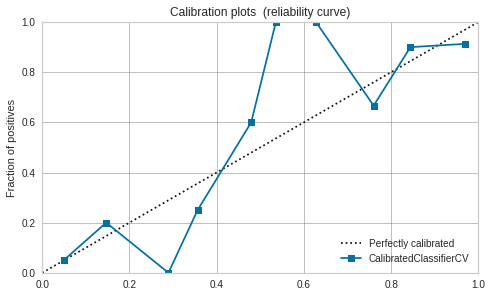

In [213]:
plot_model(rf_calibrated, plot='calibration')

In [214]:
rf_calibrated_isotonic = calibrate_model(tuned_rf, method = 'isotonic')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.9091  0.9833  0.8333  1.0000  0.9091  0.8197
1       0.9091  0.9167  0.9167  0.9167  0.9167  0.8167
2       0.8095  0.9074  0.9167  0.7857  0.8462  0.6000
3       0.8571  0.8704  0.9167  0.8462  0.8800  0.7042
4       0.8095  0.9722  1.0000  0.7500  0.8571  0.5882
5       0.6667  0.8091  0.6364  0.7000  0.6667  0.3348
6       0.8571  0.9455  0.8182  0.9000  0.8571  0.7149
7       0.7619  0.8909  0.9091  0.7143  0.8000  0.5161
8       0.8095  0.9182  0.8182  0.8182  0.8182  0.6182
9       0.7619  0.9455  0.8182  0.7500  0.7826  0.5205
Mean    0.8152  0.9159  0.8583  0.8181  0.8334  0.6233
SD      0.0700  0.0486  0.0936  0.0924  0.0692  0.1407

In [215]:
print(rf_calibrated_isotonic)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=60,
                                                             max_features='sqrt',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=2,
                                                             min_samples_split=2,
                                 

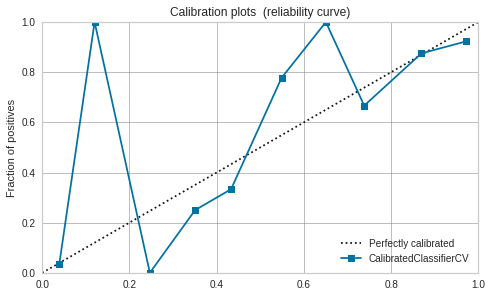

In [216]:
plot_model(rf_calibrated_isotonic, plot='calibration')

# Optimize Threshold
* By default we use .5 as a decision boundary
* If we assign costs to:
  * True Positive
  * False Positive
  * True Negative
  * False Negative
* We can attempt to find an optimal setting taking into account costs

In [217]:
optimize_threshold(tuned_rf, false_positive=-1000, false_negative = -4500)

Optimized Probability Threshold: 0.26 | Optimized Cost Function: -20500


# Ensembling

## Bagging
* Bagging involves using permuation to generate multiple models
* The models are used to vote on each prediction

In [71]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8636  0.8750  0.7500  1.0000  0.8571  0.7317
1       0.6818  0.6917  0.5833  0.7778  0.6667  0.3740
2       0.7143  0.6806  0.9167  0.6875  0.7857  0.3824
3       0.7143  0.7083  0.7500  0.7500  0.7500  0.4167
4       0.6667  0.6528  0.7500  0.6923  0.7200  0.3099
5       0.5714  0.5682  0.6364  0.5833  0.6087  0.1370
6       0.8095  0.8091  0.8182  0.8182  0.8182  0.6182
7       0.5714  0.5682  0.6364  0.5833  0.6087  0.1370
8       0.7143  0.7045  0.9091  0.6667  0.7692  0.4167
9       0.7619  0.7636  0.7273  0.8000  0.7619  0.5249
Mean    0.7069  0.7022  0.7477  0.7359  0.7346  0.4048
SD      0.0879  0.0917  0.1057  0.1175  0.0796  0.1792

In [53]:
dt_bagged = ensemble_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8636  0.9583  0.7500  1.0000  0.8571  0.7317
1       0.7727  0.9000  0.5833  1.0000  0.7368  0.5600
2       0.7619  0.8472  0.7500  0.8182  0.7826  0.5205
3       0.7143  0.7685  0.6667  0.8000  0.7273  0.4324
4       0.8095  0.9491  1.0000  0.7500  0.8571  0.5882
5       0.5714  0.6455  0.6364  0.5833  0.6087  0.1370
6       0.8095  0.9045  0.7273  0.8889  0.8000  0.6216
7       0.7619  0.7727  0.9091  0.7143  0.8000  0.5161
8       0.7619  0.9045  0.7273  0.8000  0.7619  0.5249
9       0.7143  0.8273  0.7273  0.7273  0.7273  0.4273
Mean    0.7541  0.8478  0.7477  0.8082  0.7659  0.5060
SD      0.0743  0.0922  0.1170  0.1223  0.0691  0.1491

In [64]:
print(dt_bagged)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=1149,


In [68]:
dt_bagged_tuned = tune_model('dt', ensemble=True, method='Bagging')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8636  0.9667  0.7500  1.0000  0.8571  0.7317
1       0.7727  0.9250  0.6667  0.8889  0.7619  0.5528
2       0.7619  0.8704  0.8333  0.7692  0.8000  0.5070
3       0.8571  0.8611  0.9167  0.8462  0.8800  0.7042
4       0.8095  0.9722  1.0000  0.7500  0.8571  0.5882
5       0.7143  0.7545  0.7273  0.7273  0.7273  0.4273
6       0.8571  0.9273  0.8182  0.9000  0.8571  0.7149
7       0.7619  0.8818  0.9091  0.7143  0.8000  0.5161
8       0.8095  0.9273  0.8182  0.8182  0.8182  0.6182
9       0.7619  0.9364  0.8182  0.7500  0.7826  0.5205
Mean    0.7970  0.9023  0.8258  0.8164  0.8141  0.5881
SD      0.0481  0.0608  0.0930  0.0873  0.0464  0.0972

In [72]:
print(dt_bagged_tuned)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=21,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=4,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=1149,
  

## Boosting
* Boosting involves making a prediction with a base learner
* Incrementally improve on the prediction by using another base learner to fit to the residual

In [73]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8636  0.8750  0.7500  1.0000  0.8571  0.7317
1       0.6818  0.6917  0.5833  0.7778  0.6667  0.3740
2       0.7143  0.6806  0.9167  0.6875  0.7857  0.3824
3       0.7143  0.7083  0.7500  0.7500  0.7500  0.4167
4       0.6667  0.6528  0.7500  0.6923  0.7200  0.3099
5       0.5714  0.5682  0.6364  0.5833  0.6087  0.1370
6       0.8095  0.8091  0.8182  0.8182  0.8182  0.6182
7       0.5714  0.5682  0.6364  0.5833  0.6087  0.1370
8       0.7143  0.7045  0.9091  0.6667  0.7692  0.4167
9       0.7619  0.7636  0.7273  0.8000  0.7619  0.5249
Mean    0.7069  0.7022  0.7477  0.7359  0.7346  0.4048
SD      0.0879  0.0917  0.1057  0.1175  0.0796  0.1792

In [74]:
dt_boosted = ensemble_model(dt, method = 'Boosting')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.6818  0.6833  0.6667  0.7273  0.6957  0.3636
1       0.6818  0.6917  0.5833  0.7778  0.6667  0.3740
2       0.7143  0.6806  0.9167  0.6875  0.7857  0.3824
3       0.8095  0.7917  0.9167  0.7857  0.8462  0.6000
4       0.6667  0.6528  0.7500  0.6923  0.7200  0.3099
5       0.6667  0.6636  0.7273  0.6667  0.6957  0.3288
6       0.8095  0.8091  0.8182  0.8182  0.8182  0.6182
7       0.5714  0.5727  0.5455  0.6000  0.5714  0.1448
8       0.7619  0.7591  0.8182  0.7500  0.7826  0.5205
9       0.8095  0.8091  0.8182  0.8182  0.8182  0.6182
Mean    0.7173  0.7114  0.7561  0.7324  0.7400  0.4260
SD      0.0751  0.0741  0.1209  0.0674  0.0809  0.1495

In [75]:
print(dt_boosted)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [76]:
dt_boosted_tuned = tune_model('dt', ensemble=True, method='Boosting')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.9091  0.9167  0.8333  1.0000  0.9091  0.8197
1       0.9091  0.8750  0.9167  0.9167  0.9167  0.8167
2       0.6667  0.5972  0.7500  0.6923  0.7200  0.3099
3       0.7619  0.8380  0.8333  0.7692  0.8000  0.5070
4       0.7143  0.8009  0.7500  0.7500  0.7500  0.4167
5       0.7143  0.7045  0.6364  0.7778  0.7000  0.4324
6       0.8571  0.8682  0.9091  0.8333  0.8696  0.7123
7       0.7143  0.6273  0.7273  0.7273  0.7273  0.4273
8       0.8095  0.8909  0.9091  0.7692  0.8333  0.6147
9       0.6190  0.7455  0.4545  0.7143  0.5556  0.2500
Mean    0.7675  0.7864  0.7720  0.7950  0.7781  0.5307
SD      0.0952  0.1071  0.1372  0.0914  0.1052  0.1915

In [77]:
print(dt_boosted_tuned)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=19,
                                                         max_features=5,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                         

## Blending
* Blending involves creating multiple models
* Averaging their predictions

### Blend Hard
* Hard voting uses the class prediction

In [83]:
blend_hard = blend_models()

Accuracy  AUC  Recall   Prec.      F1   Kappa
0       0.9091  0.0  0.8333  1.0000  0.9091  0.8197
1       0.8182  0.0  0.7500  0.9000  0.8182  0.6393
2       0.7619  0.0  0.9167  0.7333  0.8148  0.4928
3       0.8571  0.0  0.9167  0.8462  0.8800  0.7042
4       0.8095  0.0  1.0000  0.7500  0.8571  0.5882
5       0.6667  0.0  0.6364  0.7000  0.6667  0.3348
6       0.8571  0.0  0.9091  0.8333  0.8696  0.7123
7       0.7143  0.0  0.8182  0.6923  0.7500  0.4220
8       0.8095  0.0  0.8182  0.8182  0.8182  0.6182
9       0.8571  0.0  0.8182  0.9000  0.8571  0.7149
Mean    0.8061  0.0  0.8417  0.8173  0.8241  0.6047
SD      0.0696  0.0  0.0965  0.0944  0.0671  0.1415

In [84]:
print(blend_hard)

VotingClassifier(estimators=[('Ridge Classifier_5',
                              RidgeClassifier(alpha=1.0, class_weight=None,
                                              copy_X=True, fit_intercept=True,
                                              max_iter=None, normalize=False,
                                              random_state=1149, solver='auto',
                                              tol=0.001)),
                             ('Linear Discriminant Analysis_10',
                              LinearDiscriminantAnalysis(n_components=None,
                                                         priors=None,
                                                         shrinkage=None,
                                                         solver='svd',
                                                         store_covariance=False,
                                                         tol=0.0001...
                                                   criterion='gini',


### Blend Soft
* Soft voting uses the class probability

In [85]:
blend_soft = blend_models(method='soft')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8636  0.9750  0.7500  1.0000  0.8571  0.7317
1       0.8636  0.9000  0.8333  0.9091  0.8696  0.7273
2       0.7619  0.8333  0.9167  0.7333  0.8148  0.4928
3       0.8095  0.8333  0.9167  0.7857  0.8462  0.6000
4       0.8095  0.9167  1.0000  0.7500  0.8571  0.5882
5       0.7143  0.8000  0.7273  0.7273  0.7273  0.4273
6       0.8571  0.9091  0.9091  0.8333  0.8696  0.7123
7       0.7619  0.8545  0.9091  0.7143  0.8000  0.5161
8       0.7619  0.9000  0.8182  0.7500  0.7826  0.5205
9       0.8095  0.9364  0.8182  0.8182  0.8182  0.6182
Mean    0.8013  0.8858  0.8598  0.8021  0.8242  0.5934
SD      0.0483  0.0512  0.0805  0.0869  0.0431  0.1004

In [86]:
print(blend_soft)

VotingClassifier(estimators=[('Linear Discriminant Analysis_8',
                              LinearDiscriminantAnalysis(n_components=None,
                                                         priors=None,
                                                         shrinkage=None,
                                                         solver='svd',
                                                         store_covariance=False,
                                                         tol=0.0001)),
                             ('K Neighbors Classifier_1',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform')),
    

### Specific Models

In [0]:
rf       = create_model('rf', verbose=False)
gbc      = create_model('gbc', verbose = False)
dt       = create_model('dt', verbose = False)
lightgbm = create_model('lightgbm', verbose = False)

In [93]:
blend_specific = blend_models(estimator_list = [rf, gbc, dt, lightgbm], method = 'soft')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8636  0.9750  0.7500  1.0000  0.8571  0.7317
1       0.7273  0.9083  0.6667  0.8000  0.7273  0.4590
2       0.8095  0.8704  0.9167  0.7857  0.8462  0.6000
3       0.8095  0.8611  0.8333  0.8333  0.8333  0.6111
4       0.7143  0.8796  0.8333  0.7143  0.7692  0.4000
5       0.5714  0.7455  0.6364  0.5833  0.6087  0.1370
6       0.8095  0.9182  0.7273  0.8889  0.8000  0.6216
7       0.6190  0.7182  0.7273  0.6154  0.6667  0.2294
8       0.8095  0.9091  0.8182  0.8182  0.8182  0.6182
9       0.7619  0.9000  0.7273  0.8000  0.7619  0.5249
Mean    0.7496  0.8685  0.7636  0.7839  0.7689  0.4933
SD      0.0883  0.0748  0.0812  0.1163  0.0769  0.1794

## Stacking

### Hard Stack
* Hard voting uses predicted class



Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.9091  1.0000  0.8333  1.0000  0.9091  0.8197
1       0.9091  0.9083  0.8333  1.0000  0.9091  0.8197
2       0.8095  0.8889  0.8333  0.8333  0.8333  0.6111
3       0.8095  0.8889  0.9167  0.7857  0.8462  0.6000
4       0.9048  0.9444  1.0000  0.8571  0.9231  0.8000
5       0.7143  0.8273  0.7273  0.7273  0.7273  0.4273
6       0.8571  0.9455  0.9091  0.8333  0.8696  0.7123
7       0.8095  0.9000  0.8182  0.8182  0.8182  0.6182
8       0.8095  0.9273  0.8182  0.8182  0.8182  0.6182
9       0.8571  0.9455  0.8182  0.9000  0.8571  0.7149
Mean    0.8390  0.9176  0.8508  0.8573  0.8511  0.6741
SD      0.0582  0.0440  0.0703  0.0829  0.0549  0.1175

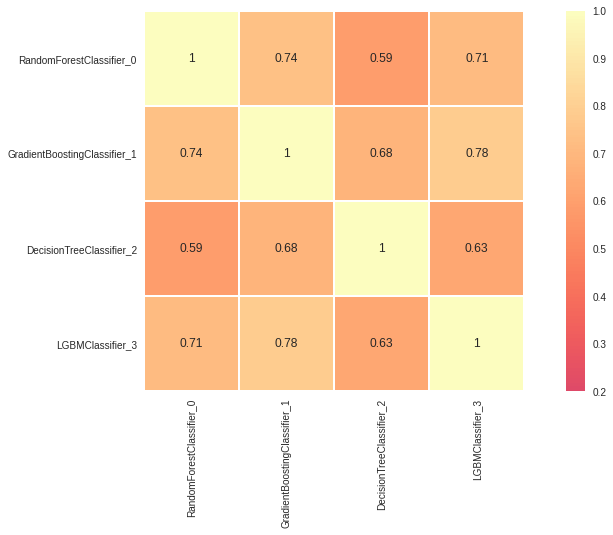

In [172]:
stack_hard = stack_models([rf, gbc, dt, lightgbm], method='hard', plot=True)

### Stack Soft
* Soft voting uses probabilities

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.9545  1.0000  0.9167  1.0000  0.9565  0.9091
1       0.9545  0.9167  0.9167  1.0000  0.9565  0.9091
2       0.8095  0.8704  0.8333  0.8333  0.8333  0.6111
3       0.8095  0.8796  0.9167  0.7857  0.8462  0.6000
4       0.9048  0.9630  1.0000  0.8571  0.9231  0.8000
5       0.7619  0.8455  0.8182  0.7500  0.7826  0.5205
6       0.8571  0.9545  0.9091  0.8333  0.8696  0.7123
7       0.8095  0.9091  0.8182  0.8182  0.8182  0.6182
8       0.8095  0.9091  0.8182  0.8182  0.8182  0.6182
9       0.8095  0.9455  0.8182  0.8182  0.8182  0.6182
Mean    0.8481  0.9193  0.8765  0.8514  0.8622  0.6917
SD      0.0639  0.0447  0.0605  0.0792  0.0590  0.1293

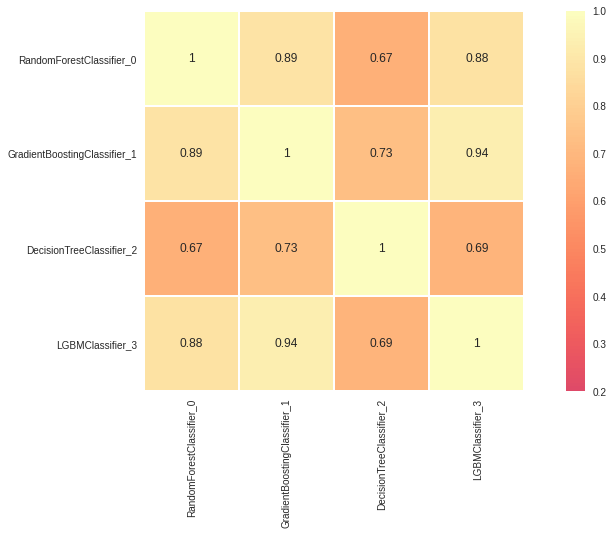

In [94]:
stack_soft = stack_models([rf, gbc, dt, lightgbm], method='soft', plot=True)

### Restacked
* Restacking refers to the ability to use the original data in addition to the scored base models
  * True = Raw + Scored
  * False = Scored

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.9545  0.9917  0.9167  1.0000  0.9565  0.9091
1       0.9091  0.9583  0.8333  1.0000  0.9091  0.8197
2       0.7619  0.8333  0.8333  0.7692  0.8000  0.5070
3       0.8571  0.8519  0.9167  0.8462  0.8800  0.7042
4       0.8095  0.9259  1.0000  0.7500  0.8571  0.5882
5       0.7143  0.7909  0.7273  0.7273  0.7273  0.4273
6       0.8095  0.9364  0.8182  0.8182  0.8182  0.6182
7       0.7619  0.8182  0.9091  0.7143  0.8000  0.5161
8       0.8095  0.9273  0.8182  0.8182  0.8182  0.6182
9       0.7619  0.9182  0.7273  0.8000  0.7619  0.5249
Mean    0.8149  0.8952  0.8500  0.8243  0.8328  0.6233
SD      0.0699  0.0632  0.0822  0.0964  0.0653  0.1418

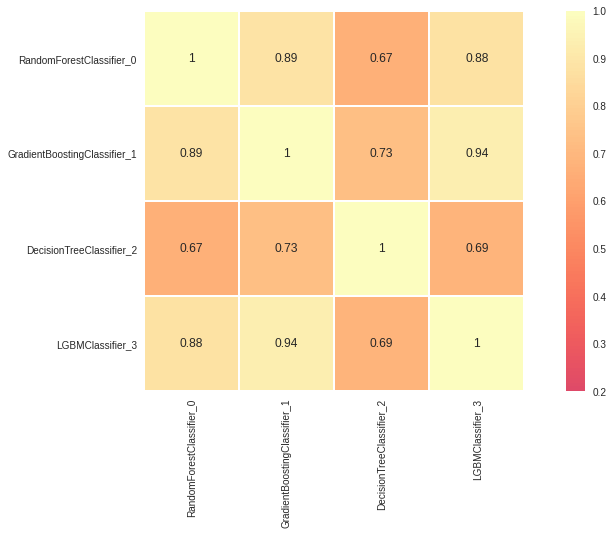

In [173]:
restack_soft = stack_models([rf, gbc, dt, lightgbm], restack=False, method='soft', plot=True)

# Finalize
* Last step in supervised learning
* Use all data (train / test)
* No cross-validation
* Train final model for saving & deployment

In [220]:
rf_final = finalize_model(tuned_rf)
rf_final

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=60, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=1149,
                       verbose=0, warm_start=False)

# Saving
* Write model to disk
* Write experiment to disk
* Pickled format

In [0]:
save_model(rf_final, model_name='random_forest_model_v1' )
save_experiment(experiment_name = 'experiment_heart_disease')

# Deploying
* Facility for saving model to cloud
* Pull model for making predictions
* Sufficient for batch predictions - caution on per-instance predictions (better to pull model local)

```python
deploy_model(rf_final, 
             model_name = 'rf_aws', 
             platform = 'aws', 
             authentication = { 'bucket'  : 'pycaret-test' })
```

```python
predictions = predict_model(model_name = 'rf_aws', 
                            data = new_data, 
                            platform = 'aws', 
                            authentication = { 'bucket' : 'pycaret-test' })
```

# Recap
* We got to almost 86% using tuned Logistic / Random Forests
* PyCaret is losely based on R's Caret package
  * Caret is a very rich toolkit
  * PyCaret 1.0 while not a full feature port, it's a very clean, easy to use package
* Definitely consider adding it to your AutoML toolkit
  * It should make you more productive 
  * Simple workflow, diagnostics, and ensembling
  * The deployment / prediction pattern is simple and clean
* Models for:
  * Classification
  * Regression
  * Clustering
  * Anomaly Detection
  * NLP (LSA / LDA -- Topic Modeling)
  * Association Modeling
* Limitations
  * Not building Neural Networks
  * Like most AutoML - not a lot to offer in feature engineering
  * Polynomial features
  * Interactions
  * Grouping
  * Binning
* Where does a data scientist add value?
  * Interpretation
  * Data / Feature Engineering
  * Scaling Models (Big Data)
  * Deep Learning / Statistical Learning (Causation)
  * Use these tools to make you more productive - work with more datasets
